## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice. <----The instructions say mice, but do you really mean records?
# Mice
unique_mice = dataset_df['Mouse ID'].unique()
unique_mouse_count = len(unique_mice)
print("Number of unique mice: " + str(unique_mouse_count))
# Records
num_records = len(dataset_df)
print("Number of records in dataset: " + str(num_records))


Number of unique mice: 249
Number of records in dataset: 1893


In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = dataset_df[dataset_df.duplicated()]
duplicated_df_index = duplicated_df.index[0]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupe_dataset_df = dataset_df.drop([duplicated_df_index])
no_dupe_dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Check the number of mice in the clean DataFrame. <---- Once again, is this supposed to be records instead of mice?
print("Number of unique mice: " + str(len(no_dupe_dataset_df['Mouse ID'].unique())))
print("Number of records in dataset: " + str(len(no_dupe_dataset_df)))

Number of unique mice: 249
Number of records in dataset: 1892


## Summary Statistics

In [7]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = no_dupe_dataset_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].reset_index(name="mean")
median = no_dupe_dataset_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].reset_index(name="median")
variance = no_dupe_dataset_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].reset_index(name="variance")
std_dev = no_dupe_dataset_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].reset_index(name="std_dev")
sem = no_dupe_dataset_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].reset_index(name="sem")

merge1 = pd.merge(mean, median, on = 'Drug Regimen')
merge2 = pd.merge(merge1, variance, on = 'Drug Regimen')
merge3 = pd.merge(merge2, std_dev, on = 'Drug Regimen')
summary_stats_df = pd.merge(merge3, sem, on = 'Drug Regimen')

summary_stats_df

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
## Observation
# Capomulin and Ramicane have the lowest mean and std_dev for tumor volume.

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

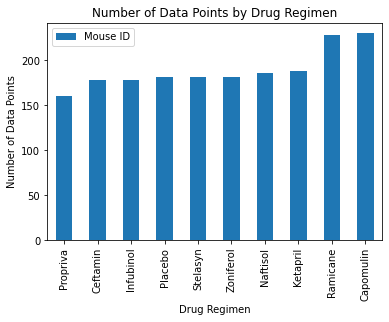

In [9]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
num_mice_per_regimen_df = no_dupe_dataset_df.groupby(['Drug Regimen']).count().sort_values(by=['Mouse ID'])

bar_df = num_mice_per_regimen_df.plot.bar(y='Mouse ID', rot=90, title = 'Number of Data Points by Drug Regimen')
bar_df.set_xlabel('Drug Regimen')
bar_df.set_ylabel('Number of Data Points')
## Note: this plot will be identical to the one that uses Pyplot

Text(0.5, 1.0, 'Number of Data Points by Drug Regimen')

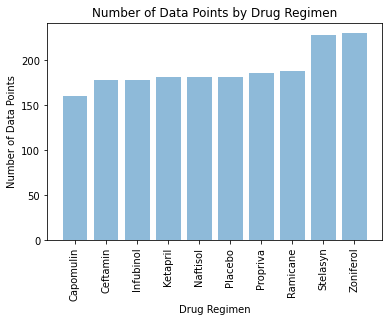

In [19]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
mouse_count = num_mice_per_regimen_df['Mouse ID']
regimen = summary_stats_df['Drug Regimen']

#y_pos = np.arange(len(mouse_count))
plt.bar(regimen, mouse_count, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points by Drug Regimen')
##  Note: this plot will be identical to the one that uses Pandas

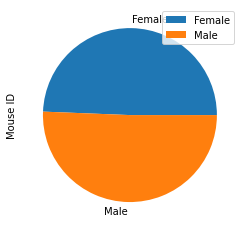

In [11]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
mouse_sex_count = no_dupe_dataset_df.groupby(['Sex']).count()
#mouse_sex_count
mouse_sex_count.plot.pie(y='Mouse ID', rot=90)
## Note: this plot will be identical to the one that uses Pyplot

([<matplotlib.patches.Wedge at 0x1a92a3f3c50>,
 [Text(0.021916657774508554, 1.099781642014448, 'Female'),
  Text(-0.021916760743497157, -1.0997816399624576, 'Male')])

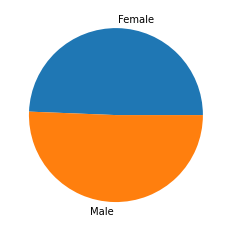

In [12]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
indexes = no_dupe_dataset_df.groupby(['Sex']).count().index
labels = indexes[0], indexes[1]
counts = [mouse_sex_count['Mouse ID'][0], mouse_sex_count['Mouse ID'][1]]
plt.pie(counts, labels=labels)

##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = no_dupe_dataset_df['Drug Regimen'] == 'Capomulin'
ceftamin = no_dupe_dataset_df['Drug Regimen'] == 'Ceftamin'
infubinol = no_dupe_dataset_df['Drug Regimen'] == 'Infubinol'
ramicane = no_dupe_dataset_df['Drug Regimen'] == 'Ramicane'
final_tumor_volume_df = no_dupe_dataset_df[(capomulin) | (ceftamin) | (infubinol) | (ramicane)].groupby('Mouse ID')
final_tumor_volume_df

# Start by getting the last (latest) timepoint for each mouse
latest_timepoint =  final_tumor_volume_df['Timepoint'].last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(no_dupe_dataset_df, latest_timepoint, on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
drug_names = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Loop through drugs
for drug_name in drug_names:
    drug = merged_df.loc[merged_df['Drug Regimen'] == drug_name]['Tumor Volume (mm3)'].reset_index(drop=True)
    tumor_list.append(drug)
    # Quartiles
    quartiles = drug.quantile([.25,.5,.75])    
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    print(f"{drug_name} \r\n Lower quartile: {lower_quartile}\r\n Upper quartile: {upper_quartile}\r\n IQR: {iqr}")
    # Bounds
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    # Outliers
    outliers = merged_df.loc[(merged_df['Drug Regimen'] == drug_name) & ((merged_df['Tumor Volume (mm3)'] < lower_bound) | (merged_df['Tumor Volume (mm3)'] > upper_bound))]
    try:
        print(f"{len(outliers)} outliers")
    except:
        print("No outliers found")

Capomulin 
 Lower quartile: 32.37735684
 Upper quartile: 40.1592203
 IQR: 7.781863460000004
0 outliers
Ceftamin 
 Lower quartile: 48.72207785
 Upper quartile: 64.29983003
 IQR: 15.577752179999997
0 outliers
Infubinol 
 Lower quartile: 54.04860769
 Upper quartile: 65.52574285
 IQR: 11.477135160000003
1 outliers
Ramicane 
 Lower quartile: 31.56046955
 Upper quartile: 40.65900627
 IQR: 9.098536719999998
0 outliers


In [ ]:
## Observation
# There is 1 outlier for Infubinol which is just below the lower bound.

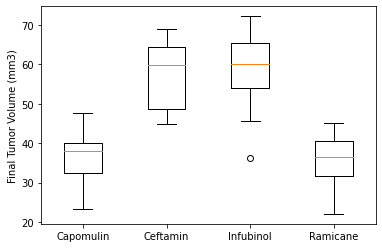

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels = drug_names)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

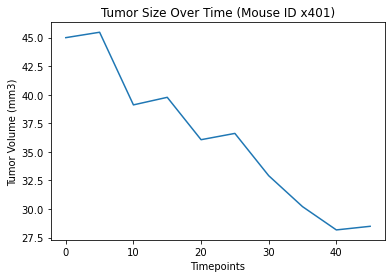

In [16]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
mouse_x401_df = no_dupe_dataset_df[(no_dupe_dataset_df['Mouse ID'] == 'x401') & (no_dupe_dataset_df['Drug Regimen'] == 'Capomulin')]
mouse_x401_tumorvol = mouse_x401_df['Tumor Volume (mm3)']
mouse_x401_timepoint = mouse_x401_df['Timepoint']

plt.plot(mouse_x401_timepoint, mouse_x401_tumorvol)
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Size Over Time (Mouse ID x401)')
plt.show()

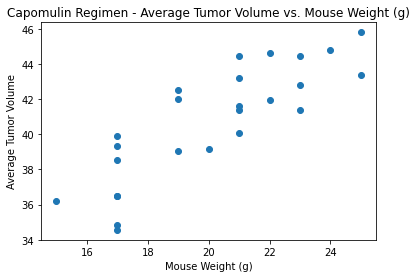

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
capomulin_avg_df = no_dupe_dataset_df[no_dupe_dataset_df['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID']).mean()
mouse_weight = capomulin_avg_df['Weight (g)']
tumor_volume = capomulin_avg_df['Tumor Volume (mm3)']

plt.scatter(mouse_weight, tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Capomulin Regimen - Average Tumor Volume vs. Mouse Weight (g)')
plt.show()

## Correlation and Regression

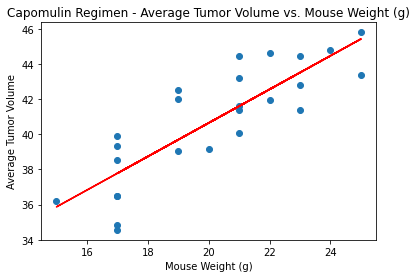

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_volume)
regress = mouse_weight * slope + intercept

plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, regress,'r-')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Capomulin Regimen - Average Tumor Volume vs. Mouse Weight (g)')
plt.show()

In [ ]:
## Observation
# For Capomulin, Mouse Weight and Average Tumor Volume seem to correlate.